# Importing the corpus


In [1]:
corpus_fr=[]
corpus_en=[]
puncList = [".",";",":","!","?","/","\\",",","#","@","$","&",")","(","\"","..."]
i=0
with open ("train_fr.fr", "r",encoding="utf8") as myfile:
    for line in myfile:
        sentence=[]
        for word in line.split(" "):
            word=word.replace("\n","")
            if(word not in puncList):
                if word.replace('.','',1).isdigit():
                    word="DIG"
                sentence.append(word) 
        corpus_fr.append(sentence)
      

       
with open ("train_en.en", "r",encoding="utf8") as myfile:
    for line in myfile:
        sentence=[]
        for word in line.split(" "):
            word=word.replace("\n","")
            if(word not in puncList):
                if word.replace('.','',1).isdigit():
                    word="DIG"
                sentence.append(word) 
        corpus_en.append(sentence)


KeyboardInterrupt: 

In [2]:
len(corpus_en) == len(corpus_fr)

True

# Building the dictionary for word2Vec

In [3]:
from gensim.models import word2vec

In [4]:
model_en=word2vec.Word2Vec(corpus_en,min_count=1)

In [5]:
model_fr=word2vec.Word2Vec(corpus_fr,min_count=1)

In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [7]:
X_fr = model_fr[model_fr.wv.vocab]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [8]:
X_en = model_en[model_en.wv.vocab]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


# PCA and Visualization

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result_fr_pca = pca.fit_transform(X_fr)

In [11]:
pca = PCA(n_components=2)
result_en_pca = pca.fit_transform(X_en)

un
deux
trois
quatre
cinq
six
sept


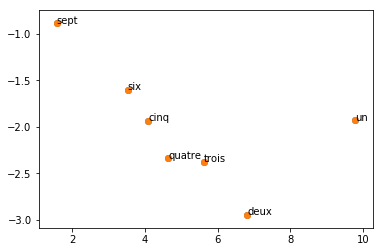

In [18]:
import numpy as np
import matplotlib.pyplot as plt
#FRENCH
# create a scatter plot of the projection
index_fr=[list(model_fr.wv.vocab).index("un"),list(model_fr.wv.vocab).index("deux"),list(model_fr.wv.vocab).index("trois"),list(model_fr.wv.vocab).index("quatre"),list(model_fr.wv.vocab).index("cinq"),list(model_fr.wv.vocab).index("six"),list(model_fr.wv.vocab).index("sept")]
result_fr=np.array([result_fr_pca[i] for i in index_fr])
plt.scatter(-result_fr[:, 0],-result_fr[:, 1])
fr_words = [ list(model_fr.wv.vocab)[i] for i in index_fr]
for i, word in enumerate(fr_words):
    print(word)
    plt.annotate(word, xy=(-result_fr[i, 0], -result_fr[i, 1]))
plt.show()

one
two
three
four
five
six
seven


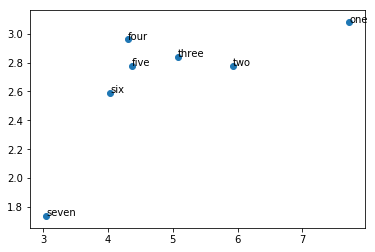

In [19]:
#ENGLISH
# create a scatter plot of the projection
index_en=[list(model_en.wv.vocab).index("one"),list(model_en.wv.vocab).index("two"),list(model_en.wv.vocab).index("three"),list(model_en.wv.vocab).index("four"),list(model_en.wv.vocab).index("five"),list(model_en.wv.vocab).index("six"),list(model_en.wv.vocab).index("seven")]
result_en=np.array([result_en_pca[i] for i in index_en])
plt.scatter(result_en[:, 0], result_en[:, 1])
en_words = [ list(model_en.wv.vocab)[i] for i in index_en]
for i, word in enumerate(en_words):
    print(word)
    plt.annotate(word, xy=(result_en[i, 0], result_en[i, 1]))
plt.show()

# Reducing Objective Function

In [20]:
from googletrans import Translator  # Import Translator module from googletrans package
translator = Translator() # Create object of Translator.

In [21]:
translated = translator.translate('one',src="en",dest="fr")
translated.text

'un'

In [43]:
import _dynet as dy
dyparams = dy.DynetParams()
dyparams.set_mem(2048)
dyparams.set_autobatch(True)
dyparams.init()

pc = dy.ParameterCollection()

# create a parameter collection and add the parameters.
m = dy.ParameterCollection()
DIMM=100
TOTAL_WORDS_FR=340762
TOTAL_WORDS_EN=340762

pW = m.add_lookup_parameters((TOTAL_WORDS_EN,TOTAL_WORDS_EN))
pX = m.add_lookup_parameters((TOTAL_WORDS_EN, DIMM))
pX.init_from_array(X_en)
pZ = m.add_lookup_parameters((TOTAL_WORDS_EN, DIMM))
pZ.init_from_array(X_fr[:TOTAL_WORDS_EN])

#pb = m.add_parameters((nodes_in_first_layer))

dy.renew_cg() # new computation graph. not strictly needed here, but good practice.

# associate the parameters with cg Expressions
W = dy.parameter(pW)
X = dy.parameter(pX)
Z = dy.parameter(pZ)

#b = dy.parameter(pb)


In [45]:
# an input vector of size 2. Also an expression.
output = dy.logistic((X*W)-Z)

In [ ]:
len(men)

In [ ]:
men=model_en[model_en.wv.vocab]

In [ ]:
len(X_en[0])